# Sigmoid Saturation in Neural Networks
This notebook shows how sigmoid neurons can saturate, causing learning to stall, and how to fix it with ReLU.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## Dataset: XOR

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

## Saturated Network (sigmoid with large weights)

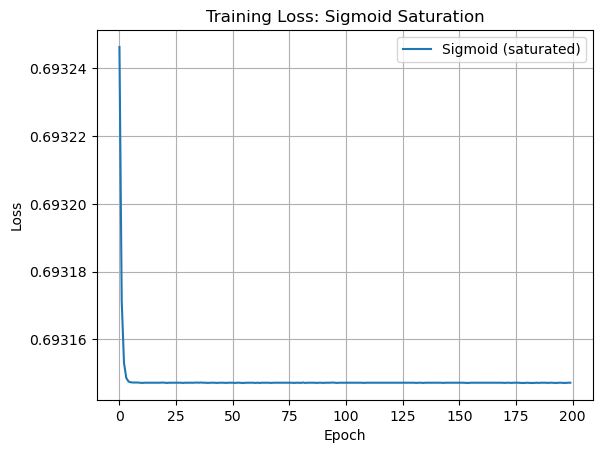

In [3]:
model_saturated = Sequential([
    Dense(4, input_dim=2, activation='sigmoid', kernel_initializer='random_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='random_normal')
])
model_saturated.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.0), metrics=['accuracy'])
history = model_saturated.fit(X, y, epochs=200, verbose=0)

plt.plot(history.history['loss'], label='Sigmoid (saturated)')
plt.title("Training Loss: Sigmoid Saturation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Activation Table Showing Saturation

In [4]:
def sigmoid(z): return expit(z)
def sigmoid_derivative(z): return sigmoid(z) * (1 - sigmoid(z))

W1 = np.array([[15, -15, 15, -15], [15, -15, -15, 15]])
b1 = np.array([0, 0, 0, 0])
W2 = np.array([[10], [-10], [10], [-10]])
b2 = np.array([0])

def forward(x):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

rows = []
for x in X:
    z1, a1, z2, a2 = forward(x)
    grad_z1 = sigmoid_derivative(z1)
    rows.append({
        'Input': x,
        'z1 (pre-activation)': np.round(z1, 2),
        'a1 (sigmoid)': np.round(a1, 4),
        'grad z1 (sigmoid′)': np.round(grad_z1, 6),
        'Output (sigmoid)': np.round(a2, 4)
    })

pd.DataFrame(rows)

,Input,z1 (pre-activation),a1 (sigmoid),grad z1 (sigmoid′),Output (sigmoid)
0,"[0, 0]","[0, 0, 0, 0]","[0.5, 0.5, 0.5, 0.5]","[0.25, 0.25, 0.25, 0.25]",[0.5]
1,"[0, 1]","[15, -15, -15, 15]","[1.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]",[0.5]
2,"[1, 0]","[15, -15, 15, -15]","[1.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",[1.0]
3,"[1, 1]","[30, -30, 0, 0]","[1.0, 0.0, 0.5, 0.5]","[0.0, 0.0, 0.25, 0.25]",[1.0]


## Sigmoid Gradient Curve

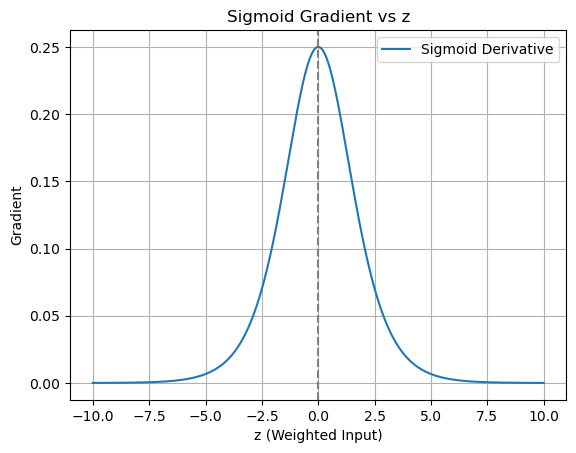

In [5]:
z_vals = np.linspace(-10, 10, 500)
sig_grad = sigmoid_derivative(z_vals)
plt.plot(z_vals, sig_grad, label="Sigmoid Derivative")
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("Sigmoid Gradient vs z")
plt.xlabel("z (Weighted Input)")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()
plt.show()

## Heatmap of First Neuron Activation

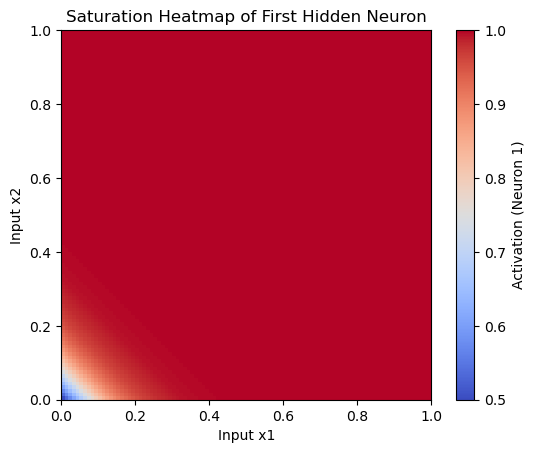

In [6]:
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
grid = np.array([[i, j] for i in x1 for j in x2])

a1_vals = []
for x in grid:
    _, a1, _, _ = forward(x)
    a1_vals.append(a1[0])  # first neuron

a1_matrix = np.array(a1_vals).reshape(100, 100)
plt.imshow(a1_matrix, extent=(0, 1, 0, 1), origin='lower', cmap='coolwarm')
plt.colorbar(label='Activation (Neuron 1)')
plt.title('Saturation Heatmap of First Hidden Neuron')
plt.xlabel('Input x1')
plt.ylabel('Input x2')
plt.show()

## Fixed Network using ReLU

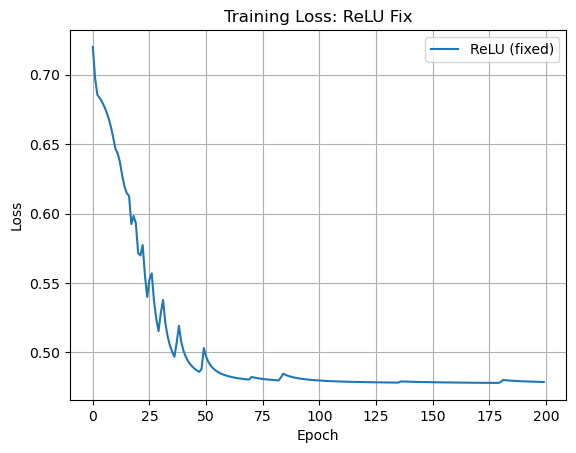

In [7]:
model_fixed = Sequential([
    Dense(4, input_dim=2, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])
model_fixed.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.0), metrics=['accuracy'])
history_fixed = model_fixed.fit(X, y, epochs=200, verbose=0)

plt.plot(history_fixed.history['loss'], label='ReLU (fixed)')
plt.title("Training Loss: ReLU Fix")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()